In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

### First step: Inspect csv file in file editor

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,Unnamed: 0,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic['survived'].sum()

342

In [6]:
titanic['survived'].mean()

0.3838383838383838

In [7]:
# Absolute Counts Aggregation
titanic[['sex','survived']].groupby('sex').sum()

,survived
sex,
female,233
male,109


In [8]:
# Absolute Counts Aggregation
titanic[['sex','survived']].groupby('sex').count()

,survived
sex,
female,314
male,577


In [9]:
# Relative Counts Aggregation
titanic[['sex','survived']].groupby('sex').mean()

,survived
sex,
female,0.742038
male,0.188908


In [10]:
# Um 'age' als diskrete Variable verarbeiten zu können, kann man es
# in Klassen einteilen (=diskretisieren)
age = pd.cut(titanic['age'], [0, 18, 80]) 

In [11]:
# Nun eine Tabelle, die die bedingte relative Überlebenshäufigkeit 
# nach DREI Merkmalen aufschlüsselt: 'sex', diskretisiertes 'age' und Passagierklasse 'class'  
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [12]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

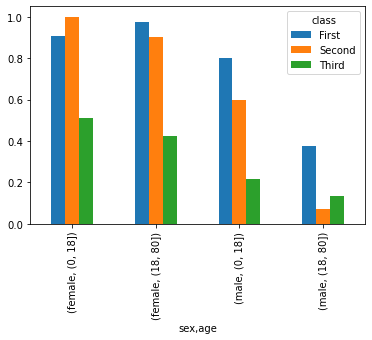

In [13]:
titanic.pivot_table('survived', ['sex', age], 'class').plot(kind="bar")

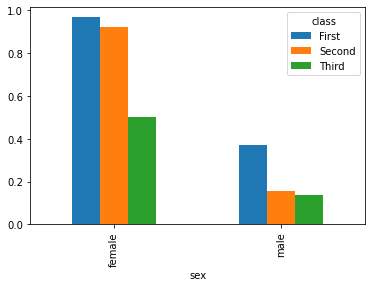

In [14]:
titanic.pivot_table('survived', index='sex', columns='class').plot(kind="bar")

In [15]:
titanic.pivot_table('survived', index='embarked', aggfunc=np.mean)
titanic.pivot_table('survived', index='embarked', aggfunc=[np.mean, np.size])

,mean,size
,survived,survived
embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


In [16]:
titanic.pivot_table('survived', index='embarked', columns='deck', aggfunc=[np.mean,np.size])


mean                                                         \
deck             A         B         C         D         E         F    G   
embarked                                                                    
C         0.571429  0.772727  0.666667  0.846154  1.000000  1.000000  NaN   
Q              NaN       NaN  0.500000       NaN  1.000000  0.000000  NaN   
S         0.375000  0.695652  0.555556  0.700000  0.692308  0.636364  0.5   

         size                                     
deck        A     B     C     D     E     F    G  
embarked                                          
C         7.0  22.0  21.0  13.0   5.0   1.0  NaN  
Q         NaN   NaN   2.0   NaN   1.0   1.0  NaN  
S         8.0  23.0  36.0  20.0  26.0  11.0  4.0

C:\Users\hore0001\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\hore0001\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


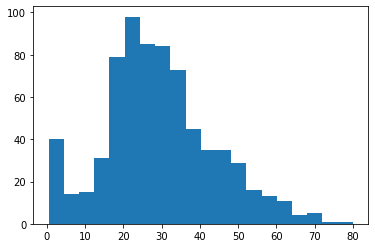

In [17]:
plt.hist(titanic['age'], bins=20);

Text(0, 0.5, 'frequency')

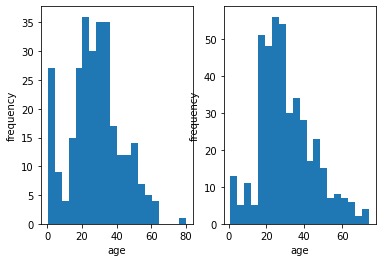

In [18]:
surv = (titanic.survived==1)
plt.subplot(1, 2, 1)
plt.hist(titanic.age[surv], bins=20);
plt.xlabel('age')
plt.ylabel('frequency')
# plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
nsurv = (titanic.survived==0)
plt.hist(titanic.age[nsurv], bins=20);
plt.xlabel('age')
plt.ylabel('frequency')

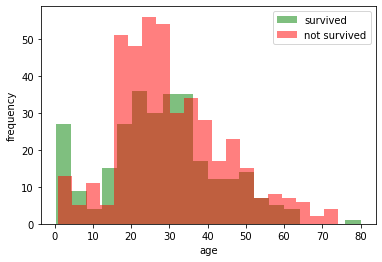

In [19]:
# Both in one diagram
plt.hist(titanic.loc[surv,'age'], bins=20, alpha=0.5, label='survived', color='green');
plt.hist(titanic.loc[nsurv,'age'], bins=20, alpha=0.5, label='not survived', color='red');
plt.xlabel('age')
plt.ylabel('frequency')
plt.legend(loc='upper right')

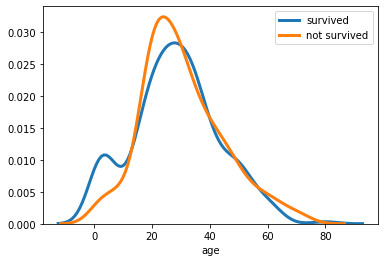

In [20]:
import seaborn as sns
sns.distplot(titanic.age[surv], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'survived')
sns.distplot(titanic.age[nsurv], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'not survived')

In [21]:
# Relative Counts Aggregation
# Um 'age' als diskrete Variable verarbeiten zu können, kann man es
# in Klassen einteilen (=diskretisieren)
agec = pd.cut(titanic['age'], [0, 18, 30, 40, 50, 60, 70]) 
titanic['agec'] = agec # add column 'agec' for age class
titanic[['agec','survived']].groupby('agec').mean()
# titanic.pivot_table('survived', ['sex', age], 'class')

,survived
agec,
"(0, 18]",0.503597
"(18, 30]",0.355556
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294


In [22]:
titanic[['agec','survived']].groupby('agec').agg([np.size, np.mean])
#h.groupby(
#    ['order_id']).agg({'add_to_cart_order' : [np.size, np.max],
#                       'reordered' : np.mean
#                     })

survived          
             size      mean
agec                       
(0, 18]       139  0.503597
(18, 30]      270  0.355556
(30, 40]      155  0.445161
(40, 50]       86  0.383721
(50, 60]       42  0.404762
(60, 70]       17  0.235294

In [23]:
from scipy import stats
surv_counts=titanic.survived.value_counts()
stats.entropy(surv_counts, base=2)

0.9607079018756469

# Aufgabe
##### Zwischen der embarkment_town und Überleben gibt es anscheinend einen Zusammenhang. Wie ist dieser zu erklären? (Nicht nur spekulieren, sondern Ihre Vermutungen auch in den Daten überprüfen.)

Überprüfen wir zunächst, ob es so einen Zusammenhang wirklich gibt:

In [24]:
titanic[['survived','embarked']].groupby('embarked').mean()

,survived
embarked,
C,0.553571
Q,0.389610
S,0.336957


#### 1. Gedanke:
Ist das überhaupt signifikant? Vielleicht sind ja an manchen Häfen nur ganz wenige Passagiere eingestiegen.

In [25]:
titanic[['survived','embarked']].groupby('embarked').count()

,survived
embarked,
C,168
Q,77
S,644


##### Naja, rein zufällig ist die Abweichung in nden Überlebensraten zwischen S und C dann wohl eher nicht, auch ohne dass wir einen formalen Hypothesentest durchführen: Wenn C die gleiche Überlebensrate wie S hätte, wären das nur ca. 1/3 von 168, also ca 55 Überlebende, während es tatsächlich über 55% von 168, also 93 waren. Das das reiner Zufall war, ist unwahrscheinlich. 

#### 2. Gedanke:
Entsteht der Zusammenhang indirekt über eine andere erklärende Variable wie "Geschlecht", "Alter" oder "Klasse"?

Indirekter Zusammenhang durch Geschlecht?

In [26]:
# Quick and dirty: add a column with 0/1 encoding for sex
#titanic['female']=0
#titanic['female'][(titanic.sex=='female')]=1
#titanic.head()

a) Weichen die Geschlechterquoten zwischen den Städten deutlich voneinander ab?

In [27]:
# Die Funktionen pivot_table und crosstab sind ähnlich, aber nur crosstab bietet die "normalize"-Option 
pd.crosstab(titanic.sex, titanic.embarked,normalize='columns') 

embarked,C,Q,S
sex,,,
female,0.434524,0.467532,0.315217
male,0.565476,0.532468,0.684783


OK, in S niedrigere Frauenquote als in C. 

In [ ]:
b) Und dass die Überlebenswahrscheinlichkeit für Frauen viel höher war als für Manner, wissen wir schon:

In [63]:
pd.crosstab(titanic.sex, titanic.survived,normalize='index') 

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Die unterschiedlichen Geschlechterquoten erklären also mindestens teilweise, warum Überlebensrate bei S niedriger als bei C ist. 

Aber erklärt das schon den ganzen Zusammenhang?:

In [29]:
titanic.pivot_table('survived', 'sex', 'embarked')

embarked,C,Q,S
sex,,,
female,0.876712,0.750000,0.689655
male,0.305263,0.073171,0.174603


Die Überlebensrate ist bei "C" sowohl für Frauen als auch Männer jeweils viel höher als bei "S". Geschlecht alleine erklärt also wohl den Zusammenhang nicht. 
Sicherheitshalber aber wieder auch die absoluten Zahlen anscheun, ob die Überlebensraten überhaupt noch aussagekräftig sind:

In [64]:
titanic.pivot_table('survived', 'sex', 'embarked', aggfunc=np.size, margins=True)

embarked,C,Q,S,All
sex,,,,
female,73,36,203,312
male,95,41,441,577
All,168,77,644,889


Müsste noch reichen. 

Wie sieht es mit class als erklärender Variable aus?

In [32]:
titanic[['pclass','embarked']].groupby('embarked').mean()

,pclass
embarked,
C,1.886905
Q,2.909091
S,2.350932


Und wieder prüfen, ob das überhaupt aussagekräftig ist:

In [33]:
titanic[['pclass','embarked']].groupby('embarked').count()

,pclass
embarked,
C,168
Q,77
S,644


Erkenntnis: In S sind auch mehr Passagiere billigerer Klassen eingestiegen. 

In [66]:
titanic[['pclass','survived']].groupby('pclass').mean()

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


Und die Überlebensrate in den billigeren Klassen war deutlich niedriger. Das könnte also auch den Zusammenhang zwischen Überleben und embarkment_town erklären. Aber auch zur Gänze?: 

In [34]:
titanic.pivot_table('survived', 'class', 'embarked')

embarked,C,Q,S
class,,,
First,0.694118,0.500000,0.582677
Second,0.529412,0.666667,0.463415
Third,0.378788,0.375000,0.189802


Und wieder prüfen, ob das überhaupt aussagekräftig ist:

In [35]:
titanic.pivot_table('survived', 'class', 'embarked', aggfunc=np.size)

embarked,C,Q,S
class,,,
First,85,2,127
Second,17,3,164
Third,66,72,353


Zumindest für einen Vergleich zwischen C und S sind die Fallzahlen ausreichend. Aber genau wie bei Geschlecht: In jeder Klasse ist die Überlebensrate in S niedriger als in C --> Class ist nicht die einzige Erklärung.

Testen wir also, ob die Kombination aus Geschlecht und Klasse den Zusammenhang erklärt:

In [36]:
titanic.pivot_table('survived', ['sex','class'], 'embarked')

embarked              C         Q         S
sex    class                               
female First   0.976744  1.000000  0.958333
       Second  1.000000  1.000000  0.910448
       Third   0.652174  0.727273  0.375000
male   First   0.404762  0.000000  0.354430
       Second  0.200000  0.000000  0.154639
       Third   0.232558  0.076923  0.128302

In [37]:
titanic.pivot_table('survived', ['sex','class'], 'embarked', aggfunc=np.size)

embarked        C   Q    S
sex    class              
female First   43   1   48
       Second   7   2   67
       Third   23  33   88
male   First   42   1   79
       Second  10   1   97
       Third   43  39  265

Zumindest in der dritten Klasse ist  sowohl bei Frauen als auch bei Männern die Überlebensrate in C höher als in S, und der Unterschied wohl auch noch aussagekräftig. --> reicht immer noch nicht als erklärende Variable. 

#### Zwischenfazit: Geschlecht und Class erklären einen Teil des Zusammenhangs, aber auch in Kombination erklären sie ihn nicht komplett. Eventuell erklären weitere Variablen des Datensatzes oder auch weitere nicht erfassten Variablen des Rest. 

#### Alter als erklärende Variable?

In [38]:
titanic.pivot_table('survived', 'agec', 'embarked')

embarked,C,Q,S
agec,,,
"(0, 18]",0.714286,0.375000,0.456311
"(18, 30]",0.586957,0.500000,0.300926
"(30, 40]",0.560000,0.142857,0.434426
"(40, 50]",0.625000,0.000000,0.338235
"(50, 60]",0.666667,0.000000,0.310345
"(60, 70]",0.000000,0.000000,0.214286


In [39]:
titanic.pivot_table('survived', 'agec', 'embarked', aggfunc=np.size)

embarked,C,Q,S
agec,,,
"(0, 18]",28,8,103
"(18, 30]",46,8,216
"(30, 40]",25,7,122
"(40, 50]",16,2,68
"(50, 60]",12,1,29
"(60, 70]",1,1,14


Fallzahlen teilweise zu klein, aber trotzdem fast in jeder Altersklasse in S geringere Überlebensrate als in C --> Alter alleine erklärt den Zusammenhang nicht.  

In [40]:
titanic[['agec','survived']].groupby('agec').mean()

,survived
agec,
"(0, 18]",0.503597
"(18, 30]",0.355556
"(30, 40]",0.445161
"(40, 50]",0.383721
"(50, 60]",0.404762
"(60, 70]",0.235294


In [41]:
titanic[['agec','survived']].groupby('agec').count()

,survived
agec,
"(0, 18]",139
"(18, 30]",270
"(30, 40]",155
"(40, 50]",86
"(50, 60]",42
"(60, 70]",17


Kein so klares Bild, dass Alter  Überlebensrate überhaupt beeinflusst - ausgenommen bei unter 18-jährigen. 

In [43]:
titanic[['age','embarked']].groupby('embarked').mean()

,age
embarked,
C,30.814769
Q,28.089286
S,29.445397


Auch kein so klares Bild, dass Alter mit town zusammenhängt. 

In [53]:
# Quick and dirty: add a column with 0/1 encoding for "age<18"
# titanic['minor']=0
# titanic['minor'][(titanic.age<18)]=1
# titanic.head(100)

In [52]:
pd.crosstab(titanic.who, titanic.embarked, normalize='columns')

embarked,C,Q,S
who,,,
child,0.107143,0.064935,0.093168
man,0.535714,0.480519,0.636646
woman,0.357143,0.454545,0.270186


Nicht nennenswert mehr Kinder in C als in S --> Kein Indiz für Alter als Erklärung des Zusammenhangs zwischen Überleben und embarkment_town gefunden 

#### Deck als erklärende Variable?

##### Gibts einen Zusammenhang zwischen Deck und embarkment_town?

In [55]:
pd.crosstab(titanic.deck,titanic.embarked,normalize='columns')

embarked,C,Q,S
deck,,,
A,0.101449,0.00,0.062500
B,0.318841,0.00,0.179688
C,0.304348,0.50,0.281250
D,0.188406,0.00,0.156250
E,0.072464,0.25,0.203125
F,0.014493,0.25,0.085938
G,0.000000,0.00,0.031250


In [59]:
pd.crosstab(titanic.deck,titanic.embarked,values=titanic.survived,aggfunc='mean')

embarked,C,Q,S
deck,,,
A,0.571429,NaN,0.375000
B,0.772727,NaN,0.695652
C,0.666667,0.5,0.555556
D,0.846154,NaN,0.700000
E,1.000000,1.0,0.692308
F,1.000000,0.0,0.636364
G,NaN,NaN,0.500000
